$$f(H^{(l)}, A) = \sigma(\hat{D}^{-\frac{1}{2}} \hat{A}\hat{D}^{-\frac{1}{2}}H^{(l)} W^{(l)})$$

In [1]:
import torch 
import torch.nn as nn

In [10]:
A=torch.Tensor([[0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0],
                [1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0],
                [1,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0],
                [1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1],
                [0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1],
                [0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,1,0,1],
                [0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,0]
                ])

In [11]:
class GCNConv(nn.Module):
    def __init__(self, A, inputs, outputs):
        super(GCNConv, self).__init__()
        # Adding self loop
        self.A_hat = A + torch.eye(A.size(0))
        '''
        Getting its degree matrix
        where torch.sum(A, 1) is a row vector with or degree,
        and torch.diag means putting all degree into diag
        '''
        self.D = torch.diag(torch.sum(A, 1))
        #D^(1/2)
        self.D = self.D.inverse().sqrt()
        #torch.mm performs the matrix multiplcation 
        self.A_hat = torch.mm(torch.mm(self.D, self.A_hat), self.D)
        self.W = nn.Parameter(torch.rand(inputs, outputs, requires_grad=True))
        
    def forward(self, X):
        out = torch.relu(torch.mm(torch.mm(self.A_hat, X), self.W))
        return out

In [18]:
# Two layers of GCN
class Net(torch.nn.Module):
    def __init__(self, A, inputs, hidden_features, outputs):
        super(Net, self).__init__()
        self.conv1 = GCNConv(A, inputs, hidden_features)
        self.conv2 = GCNConv(A, hidden_features, outputs)
    
    def forward(self, X):
        H = self.conv1(X)
        H2 = self.conv2(H)
        return H2

In [19]:
# labels
target=torch.tensor([0,-1,-1,-1, -1, -1, -1, -1,-1,-1,-1,-1, -1, -1, -1, -1,-1,-1,-1,-1, -1, -1, -1, -1,-1,-1,-1,-1, -1, -1, -1, -1,-1,1])

In [20]:
'''
X is the feature matrix. 
Since we don't have any feature of each node, 
we will just be using the one-hot encoding corresponding to the index of the node.
'''
X = torch.eye(A.size(0))
X

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [21]:
'''
Here we are creating a Network with 
10 features in the hidden layer and 2 in output layer.
'''
inputs = X.size(0)
T = Net(A, X.size(0), 10, 2)

In [23]:
from torch.optim import SGD
loss_function = nn.CrossEntropyLoss(ignore_index=-1)
optimizer = SGD(T.parameters(), lr=0.01)

In [25]:
loss = loss_function(T(X), target)

In [32]:
import matplotlib.pyplot as plt
%matplotlib notebook

import imageio
from celluloid import Camera
from IPython.display import HTML
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'

<IPython.core.display.Javascript object>


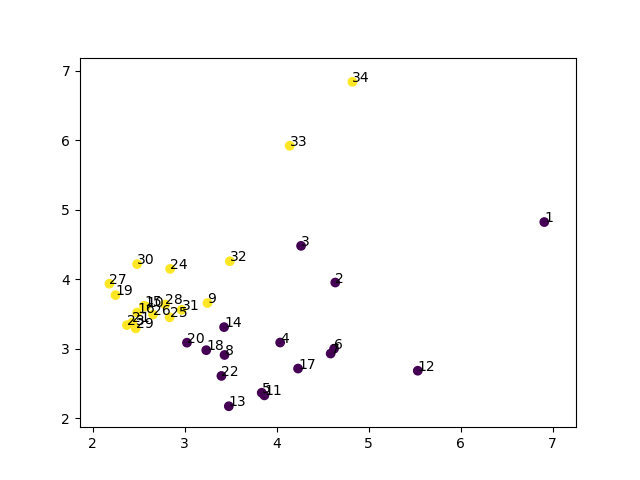

MovieWriter ffmpeg unavailable; using Pillow instead.


RuntimeError: Requested MovieWriter (ffmpeg) not available

In [33]:
# Plot animation using celluloid
fig = plt.figure()
camera = Camera(fig)

for i in range(200):
    optimizer.zero_grad()
    loss=loss_function(T(X), target)
    loss.backward()
    optimizer.step()
    l=(T(X));

    plt.scatter(l.detach().numpy()[:,0],l.detach().numpy()[:,1],c=[0, 0, 0, 0 ,0 ,0 ,0, 0, 1, 1, 0 ,0, 0, 0, 1 ,1 ,0 ,0 ,1, 0, 1, 0 ,1 ,1, 1, 1, 1 ,1 ,1, 1, 1, 1, 1, 1 ])
    for i in range(l.shape[0]):
        text_plot = plt.text(l[i,0], l[i,1], str(i+1))

    camera.snap()

    if i%20==0:
        print("Cross Entropy Loss: =", loss.item())

animation = camera.animate(blit=False, interval=150)
animation.save('./train_karate_animation.gif', writer='ffmpeg', fps=60)
HTML(animation.to_html5_video())